In [1]:
import pandas as pd

 # Загрузка данных и первыичный осмотр

In [2]:
data = pd.read_csv("S02-hw-dataset.csv")

In [3]:
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [4]:
data.head(10) # вывод первых 10 строк датасета

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [5]:
data.info() # информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
data.describe() # базовая описательная статистика

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [7]:
len(data) # количество строк

41

In [8]:
data.shape # форма таблицы

(41, 5)

In [9]:
data.columns # выведем названия столбцов

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

## Пропуски, дубликаты и базовый контроль качества

In [10]:
data.isna().mean() # доля пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [11]:
data.isna().sum() # сколько пропусков всего

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [12]:
# имеется два пропуска в поле age - первая проблема качества данных

In [13]:
data[data.duplicated() == True] # проверка наличия полностью дублирующих строк

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [14]:
# вывод показал, что 41 строка является дубликатом - это вторая проблвема качества данных

In [15]:
data[data['user_id'] < 0] # вывод подозрительных значений столбца user_id

,user_id,age,country,purchases,revenue


In [16]:
# с столбцов айди всё ок

In [17]:
data[(data['age'] > 100) | (data['age'] <= 0)] # вывод подозрительных значений столбца age

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [18]:
# одно значение имеется

In [19]:
data[(data['purchases'] < 0)] # проверем поле количества покупок

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [20]:
# имеется значение с неккоректным значением в столбце покупок (возможно кто-то подарил товар, но таких добряков не существует!)

In [21]:
data[(data['purchases'] > 0) & (data['revenue'] <= 0)] # проверка столбца с выручкой

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [22]:
# такая строка найден!

In [23]:
# объединим все условия плохих строк и выведим все строки подходящие под это условие
not_corr_user = data['user_id'] < 0
not_corr_age = (data['age'] > 100) | (data['age'] <= 0)
not_corr_purchases = (data['purchases'] < 0)
not_corr_revenue = (data['purchases'] > 0) & (data['revenue'] <= 0)
mask = not_corr_user | not_corr_age | not_corr_purchases | not_corr_revenue
data[mask]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0


В данном датасете имеются следующие проблемы: имеются пропуски данных в столбце age (2 штуки), имеется один дубликат. Также имеются два подохрительных случая, где возраст слишком большой, количество покупок отрицательно, выручка нулевая, хотя имеются продажи.

## Базовый EDA: группировки, агрегаты и частоты

In [24]:
data['country'].value_counts() # считаем частоты для одной категариальной переменной

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [25]:
result = data.groupby('country') # группирока по странам

In [26]:
result.count() # агрегирующая функция для количественных признаков - количество

,user_id,age,purchases,revenue
country,,,,
CN,2,2,2,2
DE,6,5,6,6
FR,12,12,12,12
RU,13,13,13,13
US,8,7,8,8


In [27]:
result.sum() # агрегирующая функция для количественных признаков - сумма

,user_id,age,purchases,revenue
country,,,,
CN,20,48.0,9,2108
DE,148,173.0,39,8673
FR,248,555.0,51,8111
RU,235,391.0,62,10271
US,179,257.0,37,4459


In [28]:
result.mean() # агрегирующая функция для количественных признаков - среднее

,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.600000,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.714286,4.625000,557.375000


In [29]:
# введём группировку возрастных групп и посчитаем сколько раз каждая группа входит в страны
bins = [0, 18, 35, 60, 100]
labels = ['Дети', 'Молодые', 'Средний возраст', 'Пожилые']

data['age_bins'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
result_2 = data.groupby('age_bins', observed=False)
result_2['country'].value_counts()

age_bins         country
Дети             RU         1
                 CN         0
                 DE         0
                 FR         0
                 US         0
Молодые          RU         9
                 FR         5
                 CN         2
                 DE         2
                 US         2
Средний возраст  FR         6
                 US         5
                 DE         3
                 RU         3
                 CN         0
Пожилые          CN         0
                 DE         0
                 FR         0
                 RU         0
                 US         0
Name: count, dtype: int64

Можно сделать вывод, что в датасете больше всего пользователей и заказов из России и Франции. При этом по средним значениям выручка от людей из германии и китая самая высокая. 
Можно выделить неожиданные эффекты:
1. Люди из Китая в среднем приносят больше денег.
2. США приносит самый маленький доход, хотя на 3 месте по количествую людей и заказов из 5.

# Визуализация данных в Matplotlib

In [30]:
import matplotlib.pyplot as plt
import numpy as np

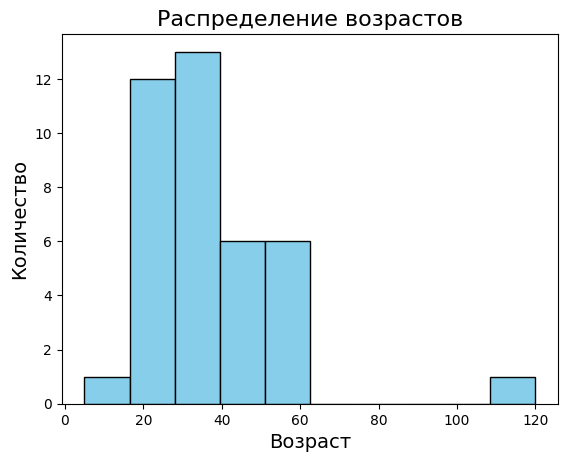

In [31]:
fig, ax = plt.subplots() 

# построение гистограммы возраста с корзинами по 10. (люди с разницей в 10 зачастую имеют разные свойства)
ax.hist(data['age'], bins=10, color='skyblue', edgecolor='black')

ax.set_title('Распределение возрастов', fontsize=16)
ax.set_xlabel('Возраст', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)

plt.show()

In [32]:
# данная гистограмма показывает распределение возраста покупателей. можно сделать вывод, что целевая аудитория в районе 20-40 лет. 

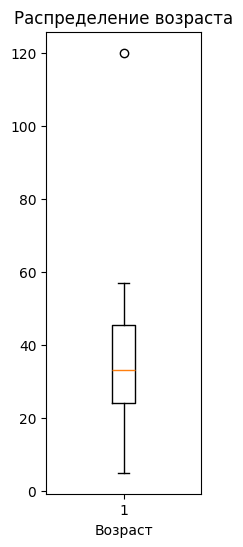

In [33]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(data['age'].dropna())

# метки осей
ax.set_xlabel('Возраст')
ax.set_title('Распределение возраста')

plt.show()

In [40]:
# данный график покащывает распределение возрастов людей
# из данной визуализации можно сделать вывод, что 50% людей в возрасте от 25 до 45 лет. 120 лет является выбросом. 

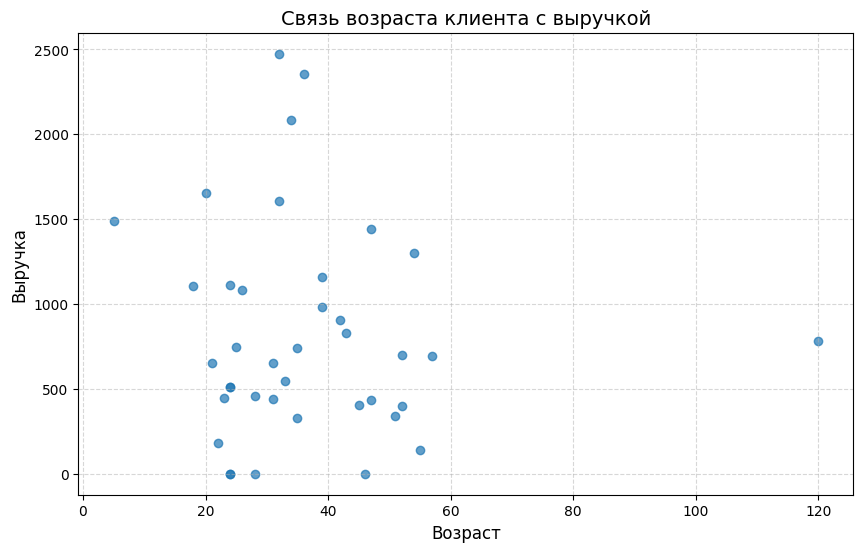

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['revenue'], alpha=0.7) 

plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Выручка', fontsize=12)

plt.title('Связь возраста клиента с выручкой', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('figures/scatter.png', format='png', dpi=300)

In [41]:
# данный график показывает Связь возраста клиента с выручкой. можно сделать вывод, что люди от 30 до 40 лет приносят наибольщую выручку